# Faire des graphiques avec OpenTURNS

## Introduction

Dans ce document, nous présentons comment réaliser des graphiques avec OpenTURNS. Nous montrons comment réaliser un graphique et configurer ses axes et ses couleurs. Puis nous présentons comment composer un graphique par combinaison de plusieurs sous-éléments graphiques.

## Les méthodes draw, la classe `Graph`

La manière la plus simple de générer un graphique est d'utiliser la méthode `draw` associée à de nombreuses classes. La classe `Normal` par exemple permet de dessiner la densité de probabilité de la loi gaussienne.

In [1]:
import openturns as ot

In [2]:
n = ot.Normal()
n

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

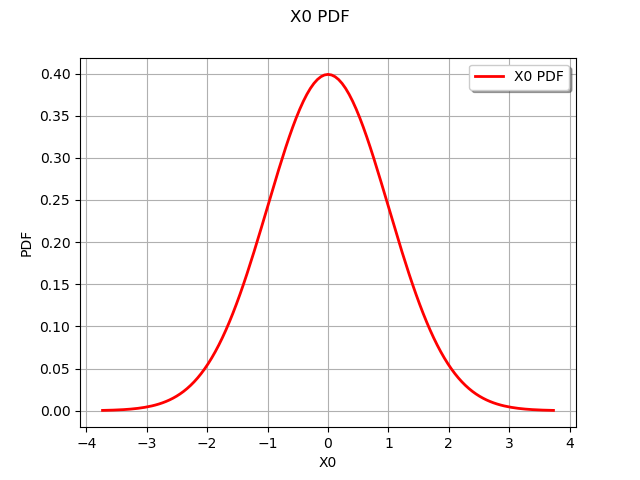

In [3]:
n.drawPDF()

Pour configurer l'apparence de ce graphique, on peut d'abord observer le type de graphique que la méthode `draw` retourne : c'est un `Graph`.

In [4]:
graph = n.drawPDF()
type(graph)

openturns.graph.Graph

La classe `Graph` dispose de plusieurs méthodes pour configurer les légendes, le titre et les couleurs. Puisqu'un graphe peut contenir plusieurs sous-graphiques, la méthode `setColors` prend en argument une liste de couleurs : chaque élément de la liste correspond au sous-graphe.

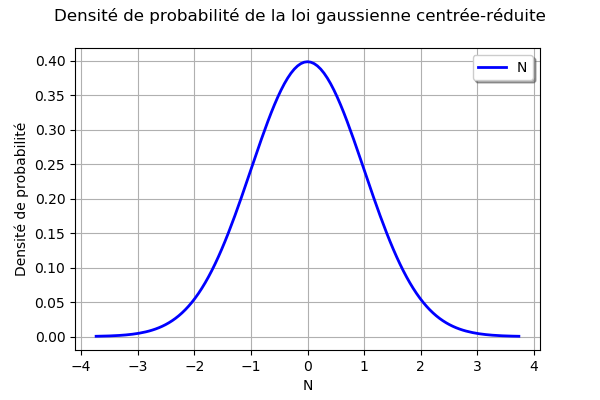

In [5]:
graph.setXTitle("N")
graph.setYTitle("Densité de probabilité")
graph.setTitle("Densité de probabilité de la loi gaussienne centrée-réduite")
graph.setLegends(["N"])
graph.setColors(["blue"])
graph

## Combiner plusieurs graphiques

Pour combiner plusieurs graphiques, on peut utiliser la méthode `add`.

Nous commençons par créer un histogramme empirique associé à un échantillon.

In [6]:
sample = n.getSample(100)

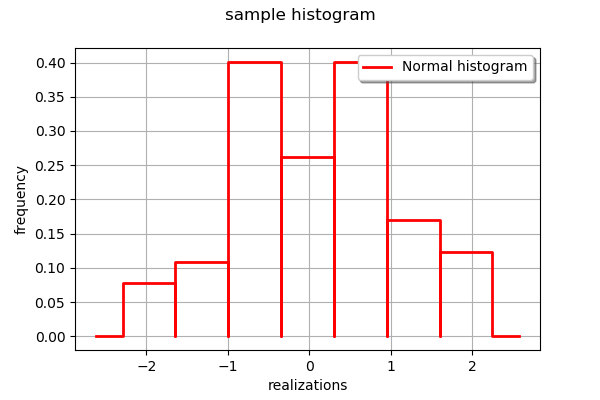

In [7]:
histo = ot.HistogramFactory().build(sample).drawPDF()
histo

Puis nous ajoutons l'histogramme au graphique `graph` avec la méthode `add`. L'objet `graph` contient désormais deux courbes superposées.

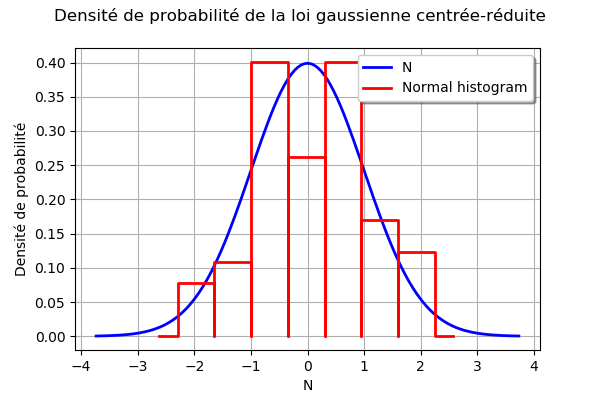

In [8]:
graph.add(histo)
graph

## Vue d'ensemble des objets graphiques

* `BarPlot` : un graphique à barres verticales
* `Cloud` : un nuage de points (ou "scatter plot")
* `Contour` : les iso-valeurs d'une fonction bidimensionnelle
* `Curve` : une courbe bidimensionnelle continue
* `Staircase` : une courbe discontinue en forme d'escalier
* `Pairs` : une matrice de nuages de points
* `Pie` : un graphique camembert
* `Polygon` et PolygonArray : des polygônes bidimensionnels colorés
* `Text` : une chaîne de caractères

## Dessiner un nuage de points

La classe `Cloud` est celle j'utilise le plus souvent pour dessiner un nuage de points bi-dimensionnels. Pour l'observer en action, créons deux distributions gaussiennes en dimension 2. 

In [9]:
# Create a Funky distribution
corr = ot.CorrelationMatrix(2)
corr[0, 1] = 0.2
copula = ot.NormalCopula(corr)
x1 = ot.Normal(-1., 1)
x2 = ot.Normal(2, 1)
x_funk = ot.ComposedDistribution([x1, x2], copula)

In [10]:
# Create a Punk distribution
x1 = ot.Normal(1.,1)
x2 = ot.Normal(-2,1)
x_punk = ot.ComposedDistribution([x1, x2], copula)

Puis mélangeons ces deux distributions en réalisant un mélange.

In [11]:
mixture = ot.Mixture([x_funk, x_punk], [0.5,1.])

In [12]:
n=500
sample = mixture.getSample(n)

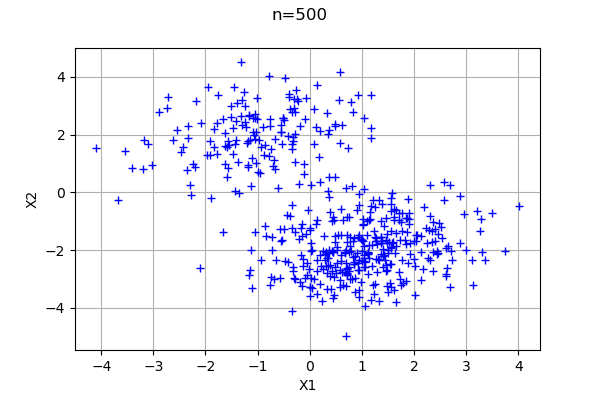

In [13]:
graph = ot.Graph("n=%d" % (n), "X1", "X2", True, '')
cloud = ot.Cloud(sample)
graph.add(cloud)
graph

En tant qu'esthète, on est parfois désireux de personnaliser le graphique en changeant le type de point (point, carré, triangle, etc...), de ligne (continue, pointillé, etc...) ou d'un autre paramètre. On peut connaître la liste des valeurs possibles avec la méthode `getValid` correspondante. 

Par exemple, la fonction suivante retourne la liste des valeurs possibles du paramètre `PointStyle`.

In [14]:
ot.Drawable.GetValidPointStyles()

[bullet,circle,diamond,dot,fcircle,fdiamond,fsquare,ftriangleup,none,plus,square,star,times,triangledown,triangleup]

In [15]:
ot.Drawable.GetValidColors()

[aliceblue,antiquewhite,antiquewhite1,antiquewhite2,antiquewhite3,antiquewhite4,aquamarine,aquamarine1,aquamarine2,aquamarine3,aquamarine4,azure,azure1,azure2,azure3,azure4,beige,bisque,bisque1,bisque2,bisque3,bisque4,black,blanchedalmond,blue,blue1,blue2,blue3,blue4,blueviolet,brown,brown1,brown2,brown3,brown4,burlywood,burlywood1,burlywood2,burlywood3,burlywood4,cadetblue,cadetblue1,cadetblue2,cadetblue3,cadetblue4,chartreuse,chartreuse1,chartreuse2,chartreuse3,chartreuse4,chocolate,chocolate1,chocolate2,chocolate3,chocolate4,coral,coral1,coral2,coral3,coral4,cornflowerblue,cornsilk,cornsilk1,cornsilk2,cornsilk3,cornsilk4,cyan,cyan1,cyan2,cyan3,cyan4,darkblue,darkcyan,darkgoldenrod,darkgoldenrod1,darkgoldenrod2,darkgoldenrod3,darkgoldenrod4,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkolivegreen1,darkolivegreen2,darkolivegreen3,darkolivegreen4,darkorange,darkorange1,darkorange2,darkorange3,darkorange4,darkorchid,darkorchid1,darkorchid2,darkorchid3,darkorchid4,darkred,darksalmon,darkseagreen,darkseagreen1,darkseagreen2,darkseagreen3,darkseagreen4,darkslateblue,darkslategray,darkslategray1,darkslategray2,darkslategray3,darkslategray4,darkslategrey,darkturquoise,darkviolet,deeppink,deeppink1,deeppink2,deeppink3,deeppink4,deepskyblue,deepskyblue1,deepskyblue2,deepskyblue3,deepskyblue4,dimgray,dimgrey,dodgerblue,dodgerblue1,dodgerblue2,dodgerblue3,dodgerblue4,firebrick,firebrick1,firebrick2,firebrick3,firebrick4,floralwhite,forestgreen,gainsboro,ghostwhite,gold,gold1,gold2,gold3,gold4,goldenrod,goldenrod1,goldenrod2,goldenrod3,goldenrod4,gray,gray0,gray1,gray10,gray100,gray11,gray12,gray13,gray14,gray15,gray16,gray17,gray18,gray19,gray2,gray20,gray21,gray22,gray23,gray24,gray25,gray26,gray27,gray28,gray29,gray3,gray30,gray31,gray32,gray33,gray34,gray35,gray36,gray37,gray38,gray39,gray4,gray40,gray41,gray42,gray43,gray44,gray45,gray46,gray47,gray48,gray49,gray5,gray50,gray51,gray52,gray53,gray54,gray55,gray56,gray57,gray58,gray59,gray6,gray60,gray61,gray62,gray63,gray64,gray65,gray66,gray67,gray68,gray69,gray7,gray70,gray71,gray72,gray73,gray74,gray75,gray76,gray77,gray78,gray79,gray8,gray80,gray81,gray82,gray83,gray84,gray85,gray86,gray87,gray88,gray89,gray9,gray90,gray91,gray92,gray93,gray94,gray95,gray96,gray97,gray98,gray99,green,green1,green2,green3,green4,greenyellow,grey,grey0,grey1,grey10,grey100,grey11,grey12,grey13,grey14,grey15,grey16,grey17,grey18,grey19,grey2,grey20,grey21,grey22,grey23,grey24,grey25,grey26,grey27,grey28,grey29,grey3,grey30,grey31,grey32,grey33,grey34,grey35,grey36,grey37,grey38,grey39,grey4,grey40,grey41,grey42,grey43,grey44,grey45,grey46,grey47,grey48,grey49,grey5,grey50,grey51,grey52,grey53,grey54,grey55,grey56,grey57,grey58,grey59,grey6,grey60,grey61,grey62,grey63,grey64,grey65,grey66,grey67,grey68,grey69,grey7,grey70,grey71,grey72,grey73,grey74,grey75,grey76,grey77,grey78,grey79,grey8,grey80,grey81,grey82,grey83,grey84,grey85,grey86,grey87,grey88,grey89,grey9,grey90,grey91,grey92,grey93,grey94,grey95,grey96,grey97,grey98,grey99,honeydew,honeydew1,honeydew2,honeydew3,honeydew4,hotpink,hotpink1,hotpink2,hotpink3,hotpink4,indianred,indianred1,indianred2,indianred3,indianred4,ivory,ivory1,ivory2,ivory3,ivory4,khaki,khaki1,khaki2,khaki3,khaki4,lavender,lavenderblush,lavenderblush1,lavenderblush2,lavenderblush3,lavenderblush4,lawngreen,lemonchiffon,lemonchiffon1,lemonchiffon2,lemonchiffon3,lemonchiffon4,lightblue,lightblue1,lightblue2,lightblue3,lightblue4,lightcoral,lightcyan,lightcyan1,lightcyan2,lightcyan3,lightcyan4,lightgoldenrod,lightgoldenrod1,lightgoldenrod2,lightgoldenrod3,lightgoldenrod4,lightgoldenrodyellow,lightgray,lightgreen,lightgrey,lightpink,lightpink1,lightpink2,lightpink3,lightpink4,lightsalmon,lightsalmon1,lightsalmon2,lightsalmon3,lightsalmon4,lightseagreen,lightskyblue,lightskyblue1,lightskyblue2,lightskyblue3,lightskyblue4,lightslateblue,lightslategray,lightslategrey,lightsteelblue,lightsteelblue1,lightsteelblue2,lightsteelblue3,lightsteelblue4,lightyellow

Dans le graphique suivant, j'utilise la couleur "aquamarine1" et les ronds "fcircle".

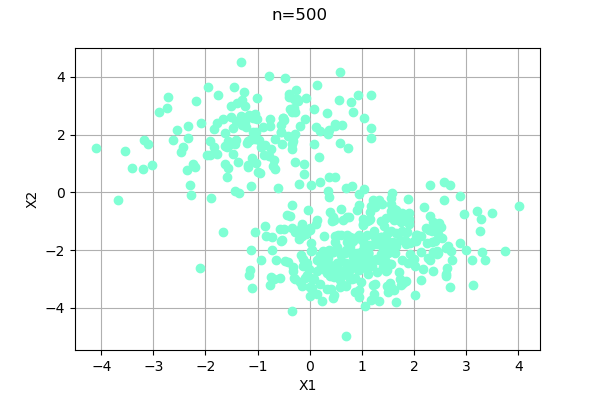

In [16]:
graph = ot.Graph("n=%d" % (n), "X1", "X2", True, '')
cloud = ot.Cloud(sample)
cloud.setColor("aquamarine1")
cloud.setPointStyle("fcircle")
graph.add(cloud)
graph

## Faire une courbe : paramétrer le style de point et l'épaisseur

Supposons qu'on souhaite dessiner la courbe sinus entre -2 et 2. Le plus simple est d'utiliser la méthode `draw`.

In [17]:
g = ot.SymbolicFunction("x","sin(x)")

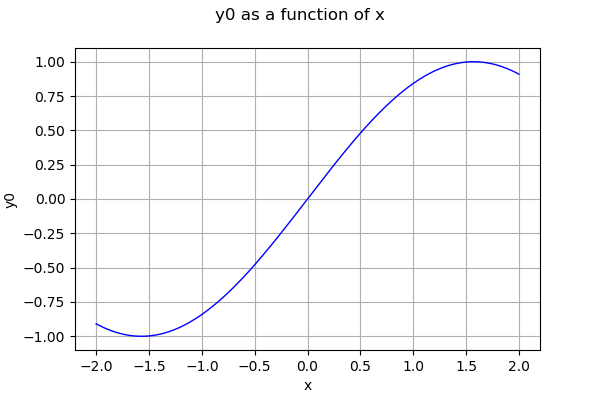

In [18]:
g.draw(-2,2)

Je préfèrerai une courbe en pointillés : cherchons la liste des styles de lignes possibles.

In [19]:
ot.Drawable.GetValidLineStyles()

[blank,solid,dashed,dotted,dotdash,longdash,twodash]

Pour utiliser la classe `Curve`, il nous sera utile de disposer d'une fonction pour générer un `Sample` contenant des points régulièrement répartis entre deux abscisses.

In [20]:
def linearSample(xmin,xmax,npoints):
    '''Returns a sample created from a regular grid 
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

In [21]:
x = linearSample(-2,2,50)
y = g(x)

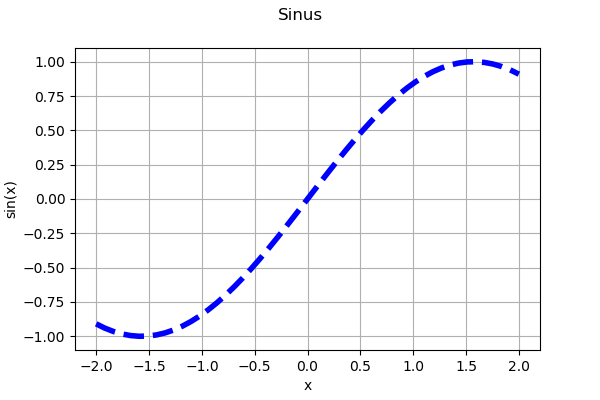

In [22]:
graph = ot.Graph("Sinus","x","sin(x)",True)
curve = ot.Curve(x,y)
curve.setLineStyle("dashed")
curve.setLineWidth(4)
graph.add(curve)
graph

## Créer des courbes colorées

Dans certaines situations, on souhaite créer des courbes de différentes couleurs. Dans ce cas, la fonction suivante génère une couleur correspondant à l'indice `indexCurve` dans un ensemble de `maximumNumberOfCurves` courbes

In [23]:
def createHSVColor(indexCurve,maximumNumberOfCurves):
    '''Create a HSV color for the indexCurve-th curve 
    from a sample with maximum size equal to maximumNumberOfCurves'''
    color = ot.Drawable.ConvertFromHSV(indexCurve * 360.0/maximumNumberOfCurves, 1.0, 1.0)
    return color

In [24]:
pofa = ot.HermiteFactory()

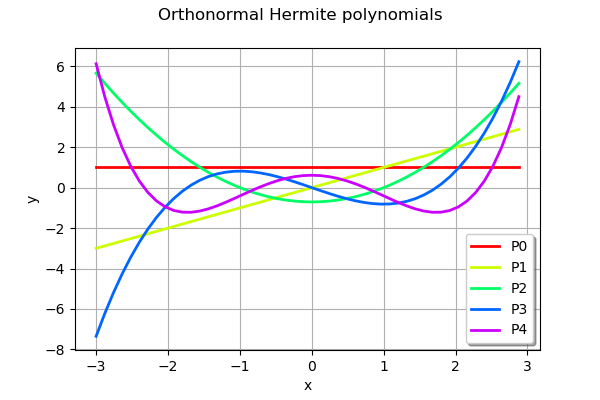

In [25]:
graph = ot.Graph("Orthonormal Hermite polynomials","x","y",True,"bottomright")
degreemax = 5
for k in range(degreemax):
    pk = pofa.build(k)
    curve = pk.draw(-3.,3.,50)
    curve.setLegends(["P%d" % (k)])
    curve.setColors([createHSVColor(k,degreemax)])
    graph.add(curve)
graph

## Faire des matrices de graphiques

La librairie ne dispose *pas* d'objets permettant de réaliser des matrices de graphiques. Certes, l'objet `Pairs` permet de dessiner les projections 2D d'un nuage de points multidimensionnel ; cet objet ne permet toutefois pas d'accéder directement aux éléments de la matrice.

En complément, nous pouvons toutefois utiliser la fonctino `add_subplot` de Matplotlib.

Nous commençons par créer deux graphiques de la densité de probabilité et de la fonction de répartition de la variable `n`.

In [26]:
n = ot.Normal()
myPDF = n.drawPDF()
myCDF = n.drawCDF()

In [27]:
import pylab as pl

Nous créons un graphique avec la fonction `figure` de Matplotlib, puis nous ajoutons un graphique avec la méthode Puis nous utilisons la fonction `viewer.View` pour créer l'objet Matplotlib. Puisque nous ne sommes pas intéressés par la valeur de retour de la fonction `View`, nous utilisons la variable `_` pour résultat. Le titre est finalement configuré avec la méthode `suptitle`.

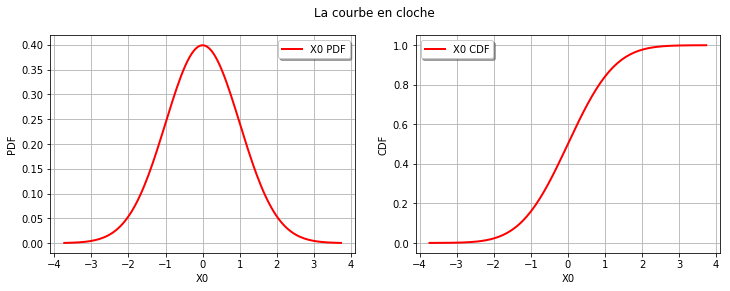

In [28]:
import openturns.viewer
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
_ = ot.viewer.View(myPDF, figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(1, 2, 2)
_ = ot.viewer.View(myCDF, figure=fig, axes=[ax_cdf])
_ = fig.suptitle("La courbe en cloche")